In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hr_data = pd.read_csv("HR_comma_sep.csv")

In [3]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [17]:
avg_satisfaction_by_year = hr_data.groupby('time_spend_company')['satisfaction_level'].mean()
avg_satisfaction_by_year

time_spend_company
2     0.697078
3     0.626314
4     0.467517
5     0.610305
6     0.603440
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction_level, dtype: float64

In [18]:
avg_satisfaction_df = avg_satisfaction_by_year.reset_index()
avg_satisfaction_df

,time_spend_company,satisfaction_level
0,2,0.697078
1,3,0.626314
2,4,0.467517
3,5,0.610305
4,6,0.603440
5,7,0.635957
6,8,0.665062
7,10,0.655327


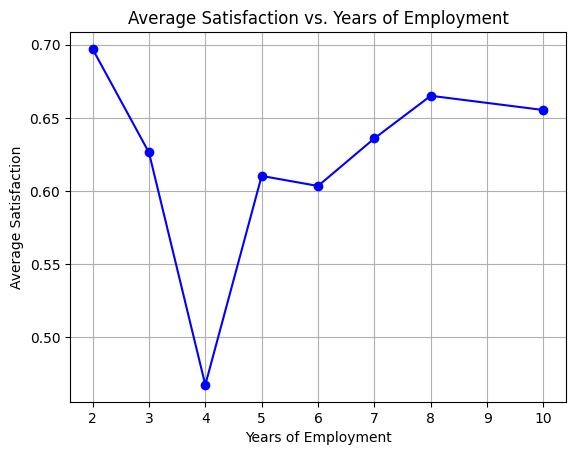

In [15]:
# Line Plot
plt.plot(avg_satisfaction_df['time_spend_company'], avg_satisfaction_df['satisfaction_level'], marker='o', color='b', linestyle='-')
plt.title('Average Satisfaction vs. Years of Employment')
plt.xlabel('Years of Employment')
plt.ylabel('Average Satisfaction')
plt.grid(True)
plt.show()

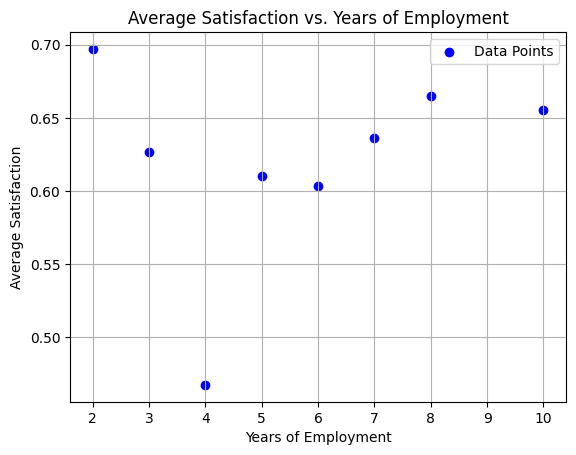

In [16]:
# Scatter Plot
plt.scatter(avg_satisfaction_df['time_spend_company'], avg_satisfaction_df['satisfaction_level'], color='b', label='Data Points')
plt.title('Average Satisfaction vs. Years of Employment')
plt.xlabel('Years of Employment')
plt.ylabel('Average Satisfaction')
plt.grid(True)
plt.legend()
plt.show()

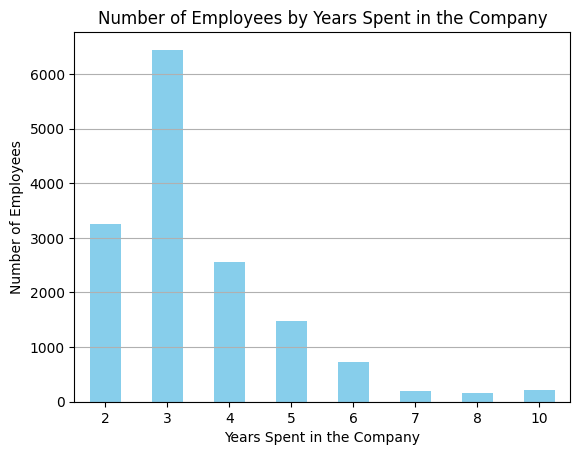

In [24]:
# 2. How many employees have spent a specific number of years (time spent in the company)?
employees_by_years = hr_data['time_spend_company'].value_counts().sort_index()

employees_by_years.plot(kind='bar', color='skyblue')
plt.title('Number of Employees by Years Spent in the Company')
plt.xlabel('Years Spent in the Company')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0) 
plt.grid(axis='y')  
plt.show()

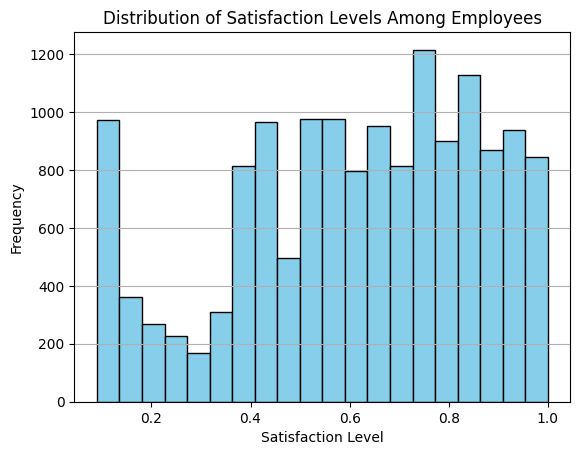

In [20]:
# 3. What is the distribution of satisfaction levels among employees?` [Histogram]
plt.hist(hr_data['satisfaction_level'], bins=20, color='skyblue', edgecolor='black')  
plt.title('Distribution of Satisfaction Levels Among Employees')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.grid(axis='y')  
plt.show()

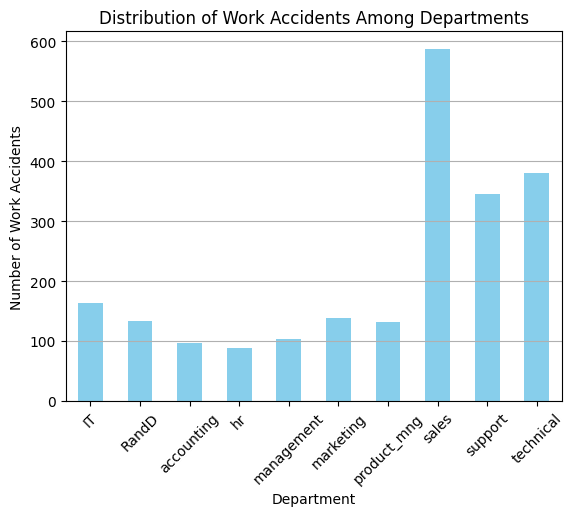

In [21]:
# 4. What is the distribution of work accidents among departments?
work_accidents_by_department = hr_data.groupby('Department')['Work_accident'].sum()

work_accidents_by_department.plot(kind='bar', color='skyblue')
plt.title('Distribution of Work Accidents Among Departments')
plt.xlabel('Department')
plt.ylabel('Number of Work Accidents')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()

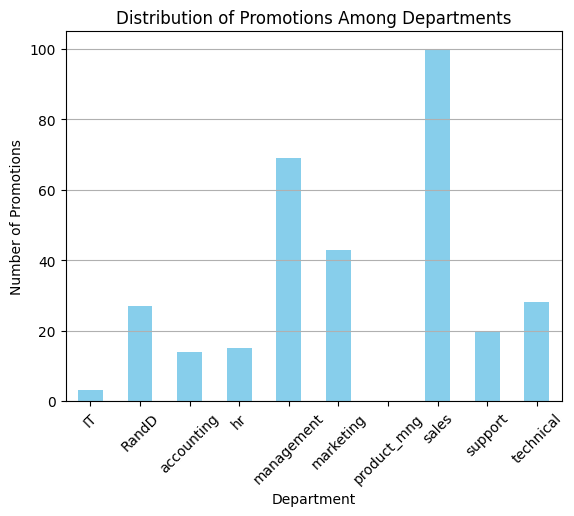

In [22]:
# 5. What is the distribution of promotions based on departments?
promotions_by_department = hr_data.groupby('Department')['promotion_last_5years'].sum()

# Create bar plot
promotions_by_department.plot(kind='bar', color='skyblue')
plt.title('Distribution of Promotions Among Departments')
plt.xlabel('Department')
plt.ylabel('Number of Promotions')
plt.xticks(rotation=45) 
plt.grid(axis='y')  
plt.show()

<Figure size 1000x600 with 0 Axes>

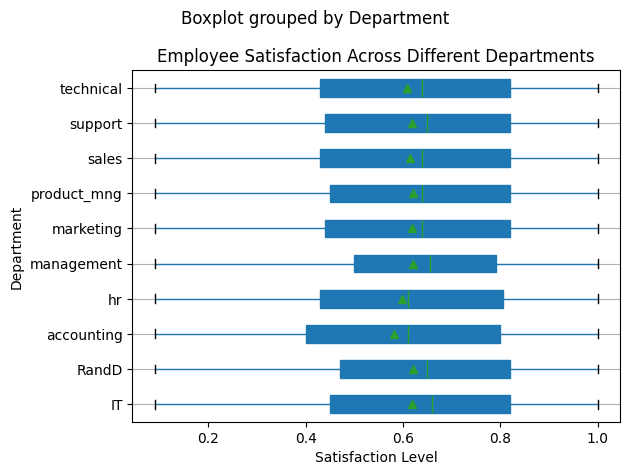

In [25]:
# 6. How does employee satisfaction vary across different departments?` [Box Plot]
plt.figure(figsize=(10, 6))  # Adjust figure size if necessary
hr_data.boxplot(column='satisfaction_level', by='Department', vert=False, patch_artist=True, showmeans=True)
plt.title('Employee Satisfaction Across Different Departments')
plt.xlabel('Satisfaction Level')
plt.ylabel('Department')
plt.grid(axis='x')  
plt.tight_layout()  
plt.show()

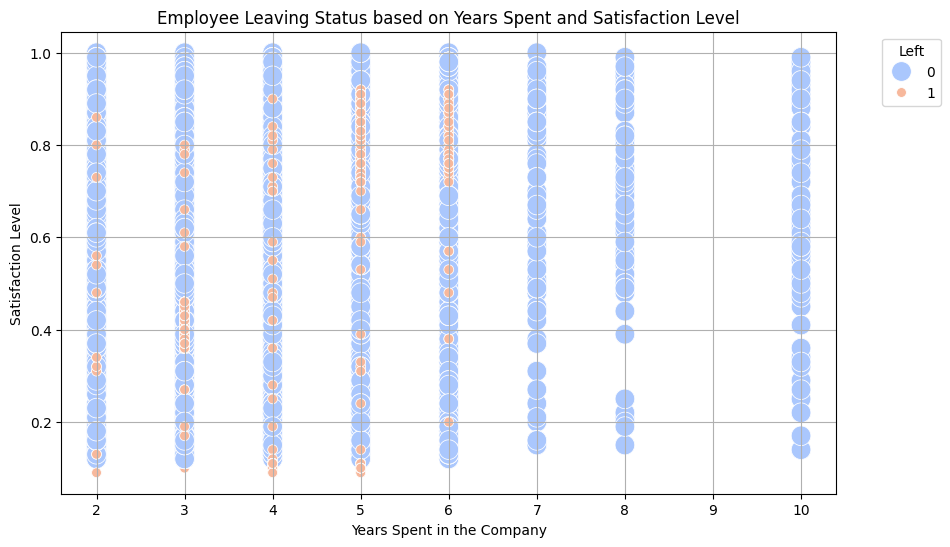

In [26]:
# 7. Figure out employee leaving status (time_spend vs satisfaction_level vs left?`[Bubble Plot]
import seaborn as sns

plt.figure(figsize=(10, 6))  # Adjust figure size if necessary
sns.scatterplot(x='time_spend_company', y='satisfaction_level', hue='left', size='left', data=hr_data, palette='coolwarm', sizes=(50, 200))
plt.title('Employee Leaving Status based on Years Spent and Satisfaction Level')
plt.xlabel('Years Spent in the Company')
plt.ylabel('Satisfaction Level')
plt.grid(True)
plt.legend(title='Left', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

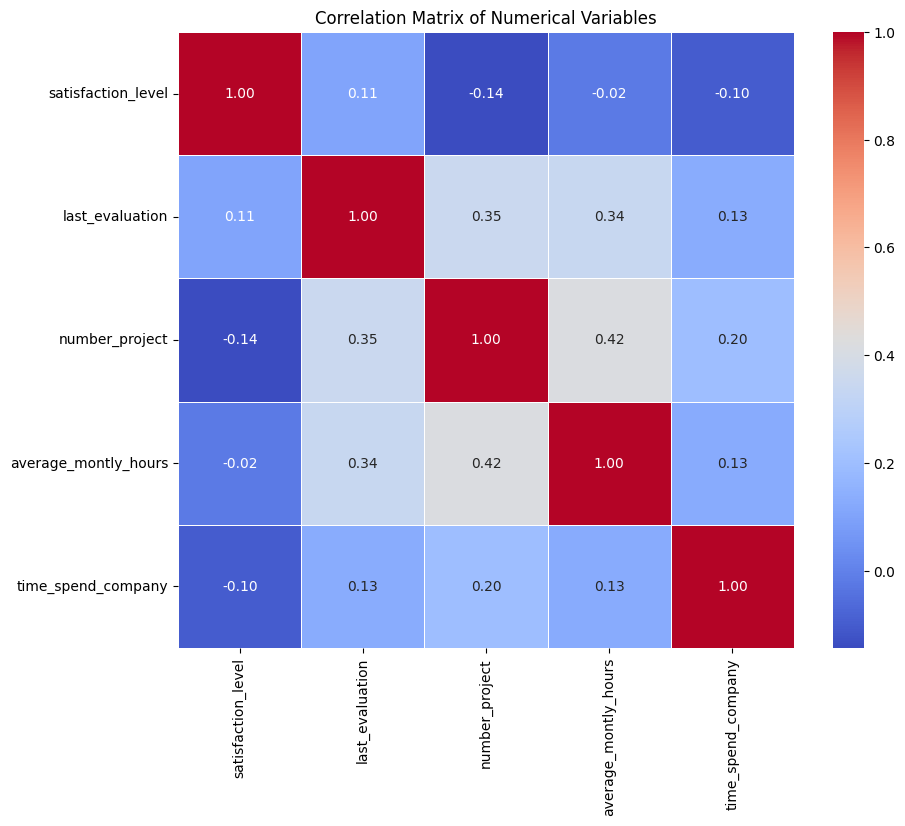

In [27]:
# 8. How are the numerical variables correlated with each other?
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']


correlation_matrix = hr_data[numerical_columns].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

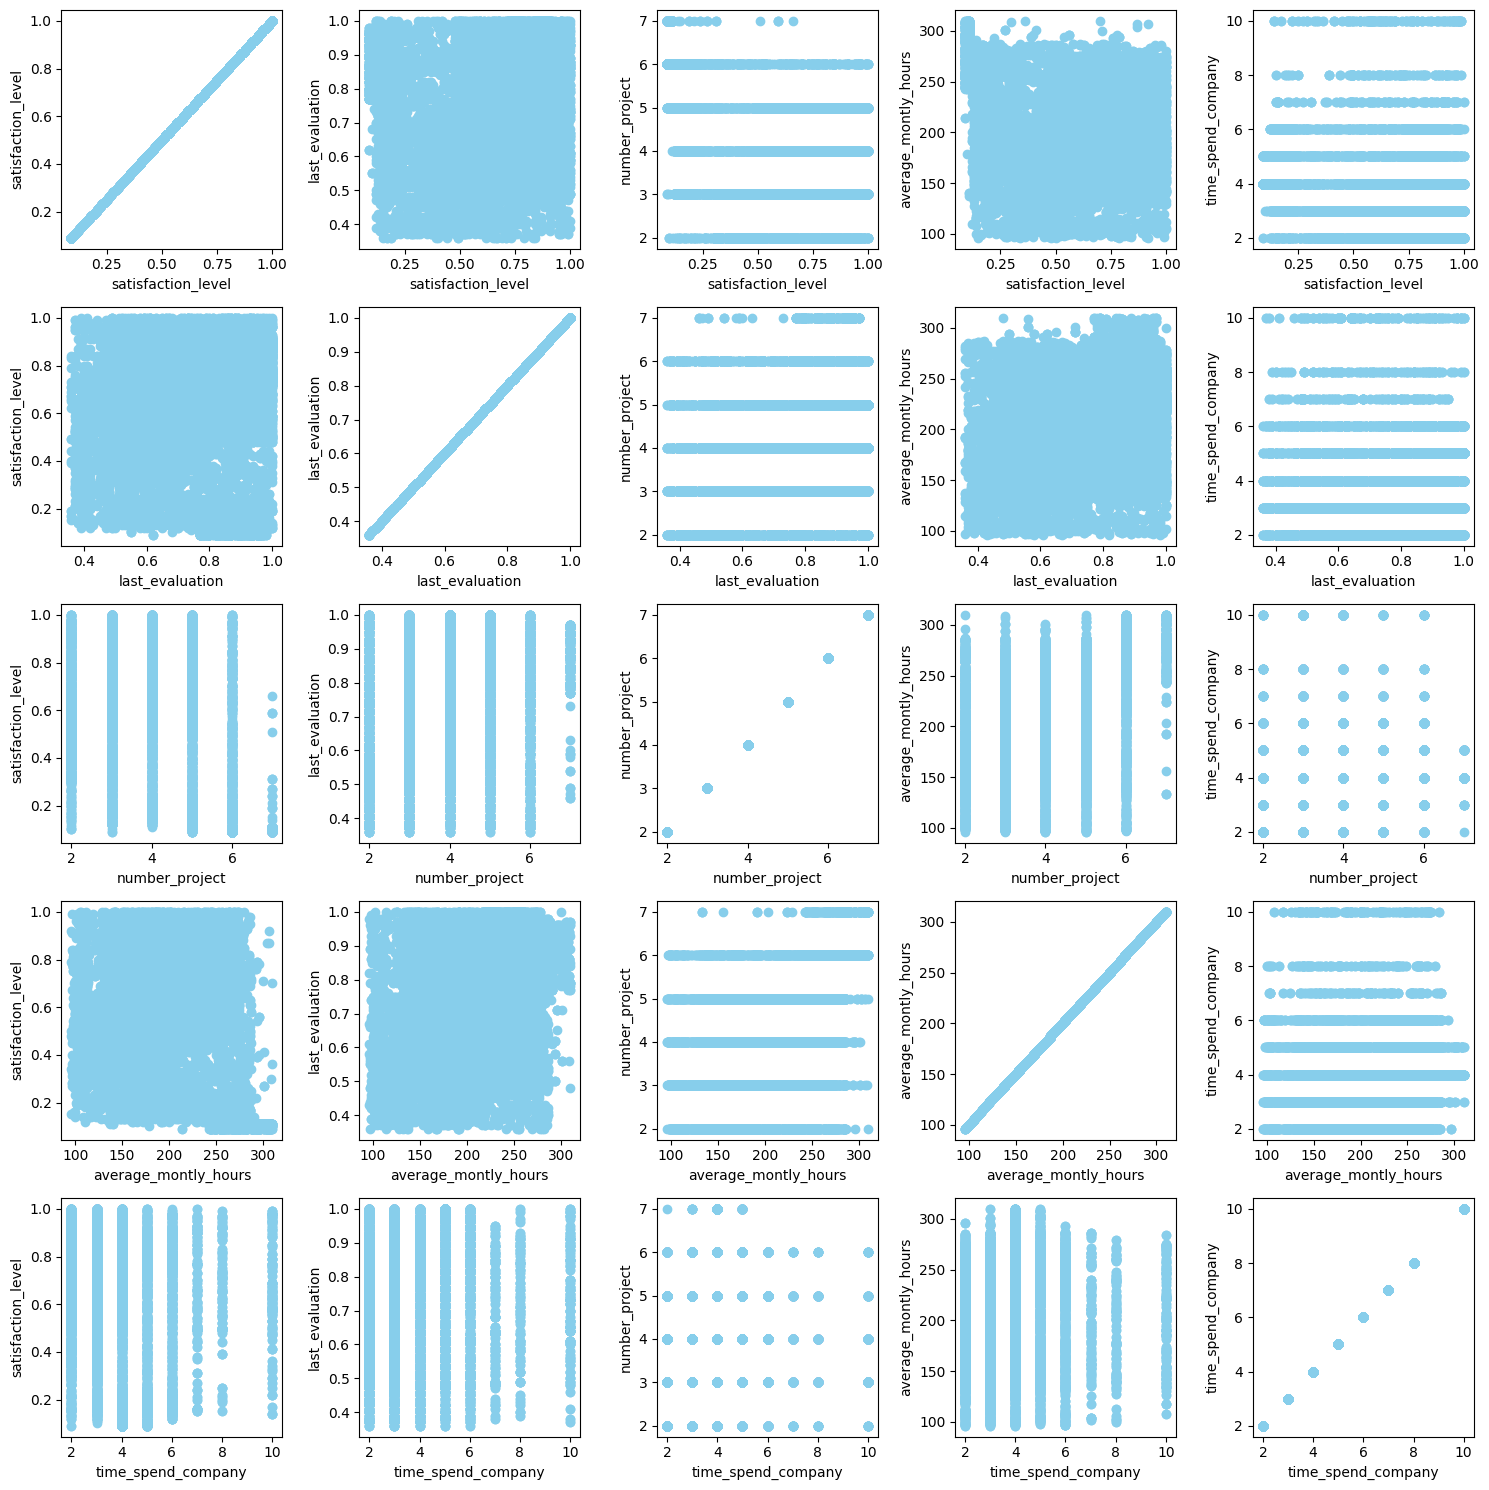

In [32]:
#  9. How to create different scatter plots under single matplotlib figure?
fig, axes = plt.subplots(5, 5, figsize=(15, 15))


axes = axes.flatten()


numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
for i, var1 in enumerate(numerical_columns):
    for j, var2 in enumerate(numerical_columns):
        axes[i*5 + j].scatter(hr_data[var1], hr_data[var2], color='skyblue')
        axes[i*5 + j].set_xlabel(var1)
        axes[i*5 + j].set_ylabel(var2)


plt.tight_layout()
plt.show()